In [1]:
import numpy as np
import functools
import itertools

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Returns the probability of n theta bernoulli variables getting r positives multiplied by
def bernoulli_prob(n, r, theta):
    theta *= 1.0
    return (theta ** r) * (1 - theta) ** (n - r)


# Scales a vector to have L1 length equal to 1


def normalize_vector(vect):
    return np.divide(vect, sum(vect))


# Given a pair of values and probabilities, it returns E[f(x)]


def expectation(values, probabilities, function):
    values = list(map(function, values))
    return np.average(values, weights=probabilities)


# Given distribution A and distribution B on np.linspace(0,1,len(distribution))
# It returns the expected value


def expectations(distribution_A, distribution_B, function):
    a = zip(distribution_A, np.linspace(0, 1, len(distribution_A)))
    b = zip(distribution_B, np.linspace(0, 1, len(distribution_B)))
    c = itertools.product(a, b)

    def f(x):
        return (x[0][0] * x[1][0], function(x[0][1], x[1][1]))

    d = map(f, c)
    return list(d)

In [3]:
# Returns a pdf from a number of observations and number of transactions, assuming a initial uniform pdf
# TODO: If n is too big the probabilities get set to zero due to floating point errors
# TODO: Need to start using BigInt types or find another way around this
def generate_pdf(n, r, bins=10 ** 3):
    # n : number of observations
    # r : number of positives
    # bins : number of points in the x coordinate to be generated
    x_coordinate = np.linspace(0, 1, bins + 1)
    f = functools.partial(bernoulli_prob, n, r)
    y_coordinate = list(map(f, x_coordinate))
    # TODO: Find a better way to normalize a vector
    y_coordinate = np.multiply(y_coordinate, (bins * 1.0 / sum(y_coordinate)))
    return y_coordinate


# Updates the confidence interval based on the original pdf


def bayesian_update(original_pdf, update_factor, bins):
    assert len(original_pdf) == bins
    assert len(update_factor) == bins
    updated_pdf = np.multiply(original_pdf, update_factor)
    # TODO: Find a better way to normalize a vector
    updated_pdf = np.multiply(updated_pdf, bins * 1.0 / sum(updated_pdf))
    return updated_pdf

In [4]:
def plot_function(distribution, fig_width=20, fig_height=3):
    distribution.sort(key=lambda t: t[1])
    plt.rcParams["figure.figsize"] = [fig_width, fig_height]
    x, y = list(zip(*distribution))
    plt.plot(x, y)
    plt.ylabel("Expected value")
    plt.show()


# Compares the plots given arrays of equal length


def plot_pdfs(distributions, bins=1000, fig_width=20, fig_height=3):
    plt.rcParams["figure.figsize"] = [fig_width, fig_height]
    patches = []
    for distribution, color, name in distributions:
        y_coordinate = distribution
        x_coordinate = np.linspace(0, 1, len(y_coordinate))
        plt.plot(x_coordinate, y_coordinate, color)
        patches.append(mpatches.Patch(color=color, label=name))
    plt.legend(handles=patches)
    plt.ylabel("probabiity density function")
    plt.show()

In [5]:
obs = [
    (10, 2, "g", "alternative_1"),
    (100, 3, "b", "alternative_2"),
    (100, 4, "r", "control"),
]


def f(a):
    return (generate_pdf(a[0], a[1]), a[2], a[3])


obs = list(map(f, obs))

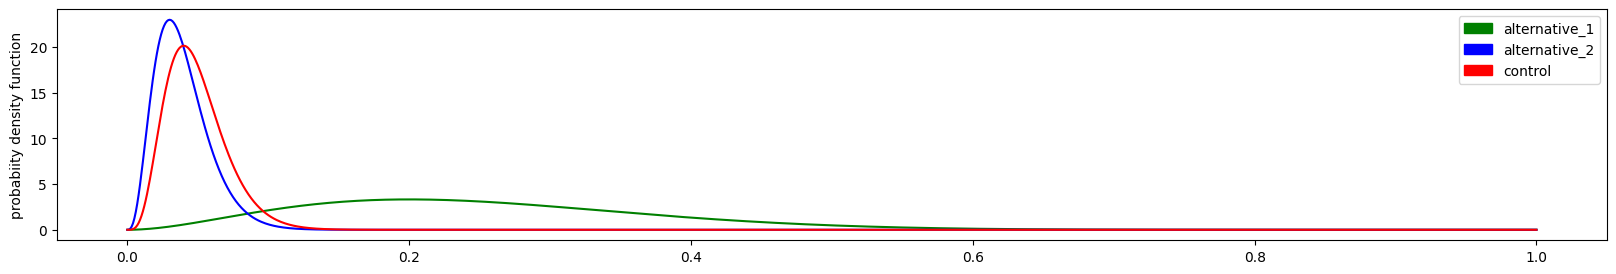

In [6]:
plot_pdfs(obs)

In [7]:
def f(a, b):
    return a - b

In [8]:
obs[0][0]

array([0.00000000e+00, 4.91053832e-04, 1.94854088e-03, ...,
       1.26213627e-19, 4.94010495e-22, 0.00000000e+00])

In [9]:
obs[1][0]

array([0.00000000e+000, 1.48212111e-002, 1.07592953e-001, ...,
       2.57236468e-255, 1.62827517e-284, 0.00000000e+000])

In [10]:
vect = expectations(obs[0][0], obs[1][0], f)

In [11]:
vect[:10]

[(0.0, 0.0),
 (0.0, -0.001),
 (0.0, -0.002),
 (0.0, -0.003),
 (0.0, -0.004),
 (0.0, -0.005),
 (0.0, -0.006),
 (0.0, -0.007),
 (0.0, -0.008),
 (0.0, -0.009000000000000001)]

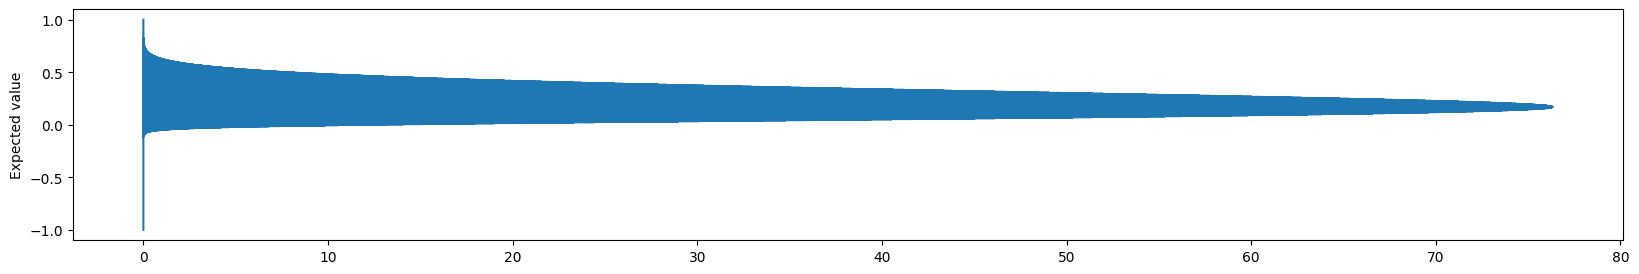

In [12]:
plot_function(vect)